<a href="https://colab.research.google.com/github/abenben/starproject-python/blob/master/slide09-base/mathplot-03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2.3.散布図

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", module="matplotlib")

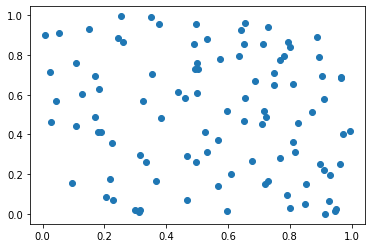

In [2]:
# 2.3.1　散布図の描画

np.random.seed(12345)
# 散布図の描画
# 入力値の生成
x = np.random.random(100)
y = np.random.random(100)
# 散布図の描画
fig, ax = plt.subplots(1, 1)
ax.scatter(x, y)

In [3]:
# 2.3.3　anime_master_csv データの読み込み

from urllib.parse import urljoin
import pandas as pd

base_url = "https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/"
anime_master_csv = urljoin(base_url, "anime_master.csv")
df = pd.read_csv(anime_master_csv)
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


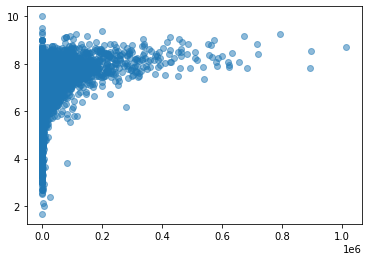

In [4]:
# 2.3.4　members と rating の値で散布図を描画

fig, ax = plt.subplots(1, 1)
ax.scatter(df["members"], df["rating"], alpha=0.5)

In [5]:
# 2.3.5　メンバ数 80 万人以上の作品

# membersの値でデータを絞り込み
df.loc[df["members"] >= 800000, ["name", "members"]]

,name,members
40,Death Note,1013917
83,Shingeki no Kyojin,896229
785,Sword Art Online,893100


In [6]:
# 2.3.6　メンバ数 60 万人以上かつレーティング 8.5 以上のデータ

# membersとratingの値でデータを絞り込み
df.loc[(df["members"] >= 600000) & (df["rating"] >= 8.5), ["name", "rating"]]

,name,rating
1,Fullmetal Alchemist: Brotherhood,9.26
3,Steins;Gate,9.17
19,Code Geass: Hangyaku no Lelouch,8.83
40,Death Note,8.71
83,Shingeki no Kyojin,8.54


In [7]:
# 2.3.7　type 列を用いてデータをグループ化

grouped = df.groupby("type")

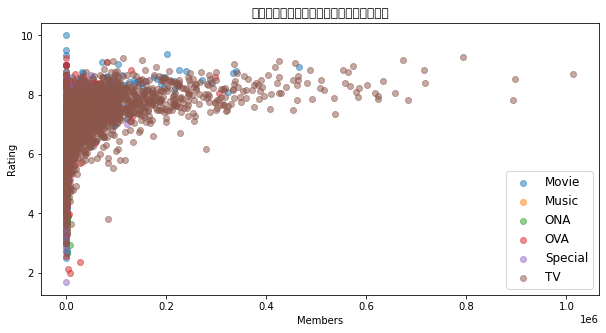

In [8]:
# 2.3.8　メディア種別ごとにグループ化されたデータの散布図の作成①

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for type_, data in grouped:
    ax.scatter(data["members"], data["rating"], alpha=0.5, label=type_)
    ax.set_title("メディア種別ごとにグループ化した散布図")
    ax.set_xlabel("Members")
    ax.set_ylabel("Rating")
    ax.legend(loc="lower right", fontsize=12)

Text(0.5, 0.98, 'メディア種別ごとにグループ化した散布図')

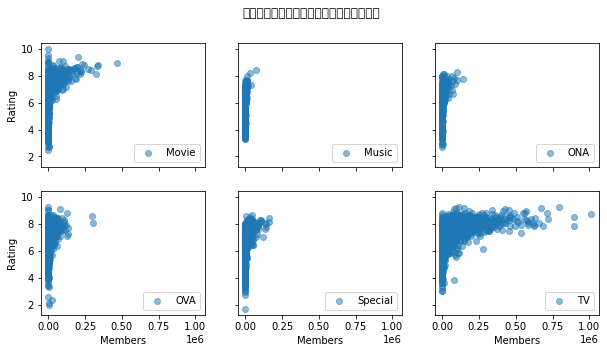

In [9]:
# 2.3.9　メディア種別ごとにグループ化されたデータの散布図の作成②

fig, axes = plt.subplots(2, 3, figsize=(10, 5), sharex=True, sharey=True)
for i, (type_, data) in enumerate(grouped):
    if i <= 2:
        axes[0, i].scatter(
            data["members"], data["rating"], alpha=0.5, label=type_
        )
        axes[0, i].legend(loc="lower right")
    else:
        axes[1, i - 3].scatter(
            data["members"], data["rating"], alpha=0.5, label=type_
        )
        axes[1, i - 3].legend(loc="lower right")
        axes[1, i - 3].set_xlabel("Members")

axes[0, 0].set_ylabel("Rating")
axes[1, 0].set_ylabel("Rating")
fig.suptitle("メディア種別ごとにグループ化した散布図")